# Pregunta 11.7

Escriba un código que implemente el método de Adams-Bashforth de dos pasos. Úselo para resolver el siguiente problema

$$
y'(t) = 1 + \frac{y}{t} + \left(\frac{y}{t}\right)^2\,,\quad 1 \leq t \leq 1.5\,,\quad y(1) = 0\,.
$$

Para ser consistente con el orden, los primeros pasos deberían ser dados por un Runge-Kutta de orden 2.

### Solucion

In [2]:
import numpy as np
import matplotlib.pyplot as plt

El metodo de **Adam-Bashforth** consiste en la siguiente aproximacion a la solucion a una ecuacion diferencial:

La solución exacta a la ecuación diferencial está dada formalmente por

$$
y(t_{i+1}) = y(t_i) + \int_{t_i}^{t_{i+1}}dt\,P_{m-1}(t) + \frac{1}{m!}f^{(m)}(\mu, y(\mu))\int_{t_i}^{t_{i+1}}dt\,(t - t_i)...(t - t_{i+1-m})\,,
$$

Donde $P$ son los polinomios de Lagrande. Como se vio en clases si ocupamos hasta el 2do punto:
$$
P_2(t) = \frac{(t - t_i)}{(t_{i - 1} - t_i)}f(t_{i-1}, y(t_{i-1})) + \frac{(t - t_{i-1})}{(t_{i} - t_{i - 1})}f(t_{i}, y(t_{i})) = - s f(t_i - h, y(t_i - h)) + (s + 1)f(t_i, y(t_i))
$$

Con $t=t_i+sh$.

$$
y(t_{i+1}) = y(t_i) + h\int_0^1ds\,\left[-s f(t_{i-1}, y(t_{i-1})) + (s + 1)f(t_i, y(t_i))\right] + \frac{h^3}{m!}f^{(m)}(\mu, y(\mu))\int_{0}^{1}ds\,s(s+1)\,,
$$

$$
y(t_{i+1}) = y(t_i) + h\left[-\frac{1}{2} f(t_{i-1}, y(t_{i-1}))+\frac{3}{2}f(t_i, y(t_i))\right] + \frac{5h^3}{12}f^{(2)}(\mu, y(\mu))\,,
$$

Ahora implementando este algoritmo en una funcion. En este caso necesitamos solo una condicion inicial, la cual puede obtener con el metodo de **Runge-Kutta** de orden 2.

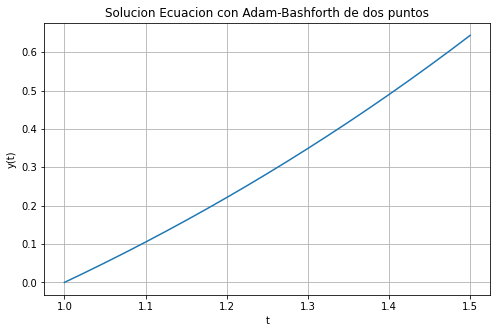

In [37]:
def rk2_step(f, fi, t, w, h):
    return h*f(t + h/2, w + h/2*fi)

def adam_bashforth2(df,a,b,y0,N):
    h = (b-a)/N
    t,w = a,y0
    ws,ts = [],[]
    f1,f2 = 0,0
    for i in range(N+1):
        ws.append(w)
        ts.append(t)
        f1 = f2
        f2 = f(t,w)
        if i<1:
            w+= rk2_step(f,f2,t,w,h)
        else:
            w+= (h*(-0.5*f1 + 3/2*f2))
        t+=h
    return np.array([ts,ws])

def f(t, y):
    return 1 + (y/t) + (y/t)**2

a = 1
b = 1.5
y0 = 0
N = 20

solve = adam_bashforth2(f, a, b, y0, N)

t,w = solve

fig = plt.figure(figsize=(8,5))

plt.plot(t,w)
plt.title("Solucion Ecuacion con Adam-Bashforth de dos puntos")
plt.xlabel("t"),plt.ylabel("y(t)")
plt.grid(True)

# Calificación: 7.0